In [1]:
import tkinter as tk,threading
import tkinter.font as tkFont
from tkinter import *
from PIL import Image, ImageTk
import cv2
import imageio
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import os
import numpy as np
import random
from matplotlib.animation import FuncAnimation
from itertools import count
import datetime
import tkinter.ttk as ttk
import customtkinter
from  matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk



class App:
    def __init__(self, root):
        #setting title
        root.title("Blender Monitor")
        #setting window size
        width=400
        height=500
        screenwidth = root.winfo_screenwidth()
        screenheight = root.winfo_screenheight()
        alignstr = '%dx%d+%d+%d' % (width, height, (screenwidth - width) / 2, (screenheight - height) / 2)
        root.geometry(alignstr)
        root.resizable(width=False, height=False)
        customtkinter.set_appearance_mode("System")  # Modes: system (default), light, dark
        GLabel_402=tk.Label(root)
        ft = tkFont.Font(family='Times',size=14)
        GLabel_402["font"] = ft
        GLabel_402["fg"] = "#333333"
        GLabel_402["justify"] = "center"
        GLabel_402["text"] = "Power State: "
        GLabel_402.place(x=8,y=20,width=100,height=50)
        
        GLabel_403=tk.Label(root)
        ft = tkFont.Font(family='Times',size=14)
        GLabel_403["font"] = ft
        GLabel_403["fg"] = "white"
        GLabel_403["justify"] = "center"
        GLabel_403["text"] = "On" # add the condition here
        GLabel_403['bg'] = "green"
        GLabel_403.place(x=120,y=25,width=30,height=30)
        
        GLabel_404=tk.Label(root)
        ft = tkFont.Font(family='Times',size=14)
        GLabel_404["font"] = ft
        GLabel_404["fg"] = "#333333"
        GLabel_404["justify"] = "center"
        GLabel_404["text"] = "Direction: Clockwise" # add the CW/CWW here
        GLabel_404.place(x=180,y=20,width=200,height=50)

        GLabel_121=tk.Label(root)
        ft = tkFont.Font(family='Times',size=13)
        GLabel_121["font"] = ft
        GLabel_121["fg"] = "#333333"
        GLabel_121["justify"] = "center"
        GLabel_121["text"] = "Cam (RT)"
        GLabel_121.place(x=10,y=80,width=126,height=30)

        GLabel_765=tk.Label(root)
        ft = tkFont.Font(family='Times',size=14)
        GLabel_765["font"] = ft
        GLabel_765["fg"] = "#333333"
        GLabel_765["justify"] = "center"
        GLabel_765["text"] = "Sensor(RT)"
        GLabel_765.place(x=30,y=280,width=97,height=30)


        GLabel_120 = tk.Button(root, text = 'Real-time Cam', command= App.cam_video)
        GLabel_120.place(x=30,y=220,width=97,height=30)
        # Speed Level
        # def func():
        #     print(len(e.get()))
        # root.after(500,func)
        label3=tk.Label(root,text='Speed Level:',bg='gold',fg='blue',)
        label3.place(x=200,y=85)

        # Show speed window
        GLabel_119 = tk.Button(root, text = 'Speed', command= App.show_speed)
        GLabel_119.place(x=200,y=220,width=97,height=30)

        # Show realtime input
        GLabel_1192 = tk.Button(root, text = 'Real-time Input', command= App.realtime_input)
        GLabel_1192.place(x=30,y=380,width=97,height=30)

        # Show granularity
        lab1 = tk.Label(root,fg='blue')
        lab1["font"] =tkFont.Font(size=12)
        lab1["bg"] = "gold"
        lab1.pack()
        def update_granularity():
            lab1['text'] = "Current granularity: {}".format(random.randint(0,1000))
            lab1.place(x=200,y=350)
            root.after(100, update_granularity)
        update_granularity()

        # update real time speed
        lab = tk.Label(root)
        lab.pack()
        def update():
            lab['text'] = random.randint(0,1000)
            lab.place(x=200,y=120)
            root.after(100, update)
        update()

    # Show the real time input
    def realtime_input():
        newWindow = Toplevel(root)
        newWindow.title("Real-time Input")
        newWindow.geometry("500x500") 
        
        def set_label():
            currentTime = datetime.datetime.now()
            label['text'] += str(currentTime) + " -> "+str(random.randint(0,100))+"	 "+str(random.randint(0,100))+"	"+str(random.randint(0,100))+"\n"
            newWindow.after(10, set_label)
        label = tk.Label(master = newWindow, text="")
        label.pack()
        set_label()


    def show_speed():
        newWindow = Toplevel(root)
        newWindow.title("Speed Real-time Graph ")
        newWindow.geometry("500x500")  
        # newWindow.bind('<Escape>', lambda e: newWindow.quit())
        index = count()
        
        fig=plt.figure(figsize=(8,8))
        lmain = tk.Label(newWindow)
        x = []
        y = [] 
        lmain.pack()
        def animate():
            pt = random.randint(1,9) # grab a random integer to be the next y-value in the animation
            x.append(next(index))
            y.append(pt)

            fig.add_subplot(111)(x, y)
            lmain.after(500, animate)
            canvas = FigureCanvasTkAgg(fig, newWindow)
        # toolbar = NavigationToolbar2Tk(canvas, newWindow)
        # toolbar.update()
            canvas._tkcanvas.pack(fill=tk.BOTH, expand=1)
            # plt.clf()
            # lmain.after(2000, animate)
        animate()

        
        
                                 


        
       
        
    
        

        # Camara    
    def cam_video():
        # Solution: Click the link and check the real-time camara data 
        newWindow = Toplevel(root)
        width, height = 800, 600
        cap = cv2.VideoCapture(0)
        cap.set(cv2.CAP_PROP_FRAME_WIDTH, width)
        cap.set(cv2.CAP_PROP_FRAME_HEIGHT, height)
        newWindow.bind('<Escape>', lambda e: newWindow.quit())
        lmain = tk.Label(newWindow)
        lmain.pack()
        def show_frame():
            _, frame = cap.read()
            frame = cv2.flip(frame, 1)
            cv2image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA)
            img = Image.fromarray(cv2image)
            imgtk = ImageTk.PhotoImage(image=img, master = newWindow, width = width, height = height)
            lmain.imgtk = imgtk
            lmain.configure(image=imgtk)
            lmain.after(10, show_frame)
        show_frame()
        # Another solution: Use screen shot (1 pic will be generated and be saved)
        # cam_port = 0
        # cam = cv2.VideoCapture(cam_port)
        # result, image = cam.read()
        # if result:
        #     cv2.imshow("current_blender", image)
        #     cv2.imwrite("current_blender.png", image)
        #     cv2.waitKey(0)
        #     cv2.destroyWindow("current_blender")
        # else:
        #     print("No image detected. Please! try again")             
    
    

    def plot_values(self):
        x = [1,2]
        y = [2,3]
        figure = plt.figure(figsize=(5,2),dpi=10)
        figure.add_subfigure(111).plot(x,y)
        chart = FigureCanvasTkAgg(figure,self.plot)
        chart.get_tk_widget().grid(row = 5, column = 0)
        return None


if __name__ == "__main__":
    root = tk.Tk()
    # root.config(bg='#0f4b6e')
    app = App (root)
    root.mainloop()
'''
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
'''

'\n!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!\n'

In [4]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import numpy as np

import tkinter as tk
root = tk.Tk()

x = np.arange(0, 10, 1)
y = np.arange(0, 10, 1)

fig1 = plt.Figure()
canvas1 = FigureCanvasTkAgg(fig1, master=root)
canvas1.show()
canvas1.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1.0)
ax = fig1.add_subplot(111)
ax.plot(x,y)
canvas1.draw()

root2 = tk.Toplevel()
fig2 = plt.Figure()
canvas2 = FigureCanvasTkAgg(fig2, master=root2)
canvas2.show()
canvas2.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1.0)
ax = fig2.add_subplot(111)
ax.plot(x,2*y)
canvas2.draw()

AttributeError: 'FigureCanvasTkAgg' object has no attribute 'show'

In [ ]:
class App:
    def __init__(self, root):
        tk.Button(text='1', master = root,command=App.new).pack()
        def new():
        newWindow = tk.Toplevel(root)
        newWindow.geometry('500x500')
    plt.style.use('fivethirtyeight')
    # values for first graph
    x = []
    y = []
    # # values for second graph
    # y_vals2 = []
    fig, ax = plt.subplots()
    index = count()


    def animate(i):
        pt = random.randint(1,9) # grab a random integer to be the next y-value in the animation
        x.append(next(index))
        y.append(pt)

        ax.clear()
        ax.plot(x, y)

    # def new():
    #     new = Toplevel(root)
    #     new.geometry('500x500')
    #     return new

    # GUI
    root = Tk.Tk()
    label = Tk.Label(root, text="Realtime Animated Graphs").grid(column=0, row=0)

    canvas = FigureCanvasTkAgg(figure=fig, master=newWindow)
    canvas.get_tk_widget().grid(column=0, row=1)
    ani = FuncAnimation(fig, animate, interval=1000, blit=False)                            
    
    def new():
        newWindow = tk.Toplevel(root)
        newWindow.title("1")
        newWindow.geometry("500x500")
        newWindow.bind('<Escape>', lambda e: newWindow.quit())
        plt.style.use('fivethirtyeight')
        x = []
        y = []
        fig, ax = plt.subplots()
        index = count()
        def animate():
            
            pt = random.randint(1,9) # grab a random integer to be the next y-value in the animation
            x.append(next(index))
            y.append(pt)

            ax.clear()
            ax.plot(x, y)
            imgtk = ImageTk.PhotoImage(image=plt.gcf(), master = newWindow, width = 100, height = 100)
            lmain.imgtk = imgtk
            # lmain.configure(image=imgtk)
            lmain['image'] = plt.gcf()
            lmain.after(10, animate)
        
        canvas = FigureCanvasTkAgg(figure=plt.gcf(), master=newWindow)
        canvas.get_tk_widget().grid(column=0, row=1)
        ani = FuncAnimation(fig, animate, interval=1000, blit=False)
        animate() 
        lmain = tk.Label(newWindow)
        lmain.pack()   

if __name__ == "__main__":
    root = tk.Tk()
    # root.config(bg='#0f4b6e')
    app = App (root)
    root.mainloop()


IndentationError: expected an indented block (3896584520.py, line 5)

TypeError: mainloop() missing 1 required positional argument: 'self'

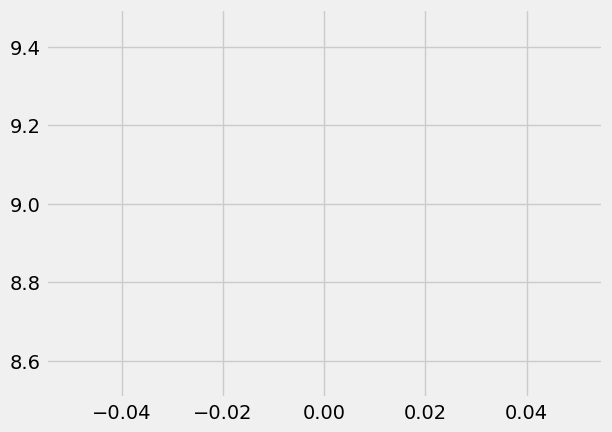

In [ ]:
plt.style.use('fivethirtyeight')
# values for first graph
x = []
y = []
# # values for second graph
# y_vals2 = []
fig, ax = plt.subplots()
index = count()


def animate(i):
    pt = random.randint(1,9) # grab a random integer to be the next y-value in the animation
    x.append(next(index))
    y.append(pt)

    ax.clear()
    ax.plot(x, y)

# def new():
#     new = Toplevel(root)
#     new.geometry('500x500')
#     return new

# GUI
root = Tk.Tk()
label = Tk.Label(root, text="Realtime Animated Graphs").grid(column=0, row=0)

canvas = FigureCanvasTkAgg(figure=fig, master=root)
canvas.get_tk_widget().grid(column=0, row=1)
ani = FuncAnimation(fig, animate, interval=1000, blit=False)

Tk.mainloop()

In [ ]:
class App

In [ ]:
# update cam pic in main window
        GLabel_1191 = tk.Label(root)
        
        
        def pic_blender():
            cam = cv2.VideoCapture(0)
            image = cam.read()
            img = ImageTk.PhotoImage(image=Image.fromarray(image))
            GLabel_1191['image'] = img
            GLabel_1191.place(x=100,y=350,width = 100, height =30)
            root.after(100, pic_blender)
        pic_blender()

In [ ]:
from tkinter import *
from PIL import ImageTk, Image
root = Tk()

canv = Canvas(root, width=280, height=280, bg='white')
canv.grid(row=2, column=3)

img = ImageTk.PhotoImage(file="manwithbmw.jpg")
canv.create_image(20,20, anchor=NW, image=img)
# img.pack(side = "bottom", fill = "both", expand = "yes")
mainloop()

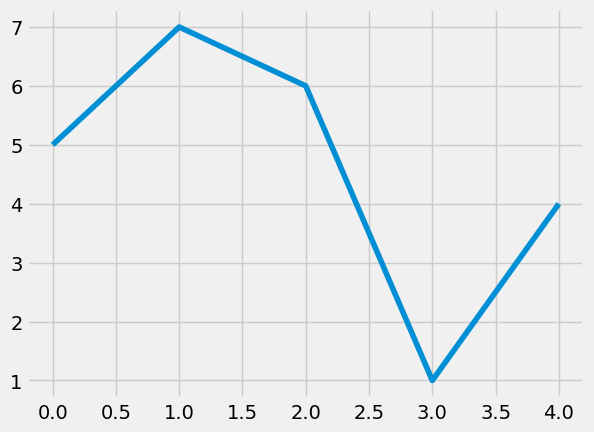

In [ ]:
import random
import tkinter as Tk
from itertools import count

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

plt.style.use('fivethirtyeight')
# values for first graph
x = []
y = []
# # values for second graph
# y_vals2 = []
fig, ax = plt.subplots()
index = count()


def animate(i):
    pt = random.randint(1,9) # grab a random integer to be the next y-value in the animation
    x.append(next(index))
    y.append(pt)

    ax.clear()
    ax.plot(x, y)



# GUI
root = Tk.Tk()
label = Tk.Label(root, text="Realtime Animated Graphs").grid(column=0, row=0)

canvas = FigureCanvasTkAgg(figure=fig, master=root)
canvas.get_tk_widget().grid(column=0, row=1)
ani = FuncAnimation(fig, animate, interval=1000, blit=False)

Tk.mainloop()

In [ ]:
    # test = ImageTk.PhotoImage(file = "manwithbmw.jpg")
    # testlab = tk.Label(image=test)
    # testlab.imgae = test
    # testlab.place(x=0, y=0,width=97,height=30)

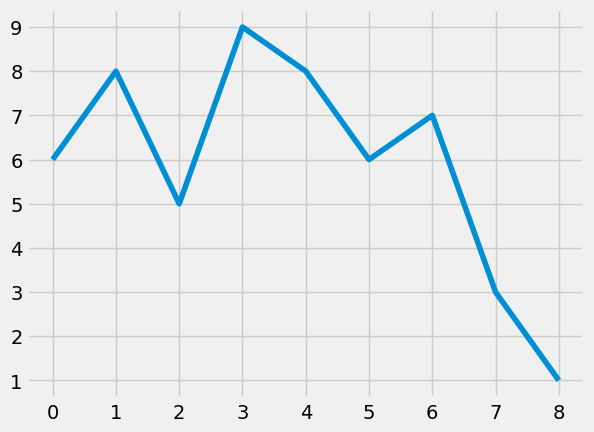

In [ ]:
import random
import tkinter as Tk
from itertools import count

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

plt.style.use('fivethirtyeight')
# values for first graph
x = []
y = []
# # values for second graph
# y_vals2 = []
fig, ax = plt.subplots()
index = count()


def animate(i):
    pt = random.randint(1,9) # grab a random integer to be the next y-value in the animation
    x.append(next(index))
    y.append(pt)

    ax.clear()
    ax.plot(x, y)



# GUI
root = Tk.Tk()
label = Tk.Label(root, text="Realtime Animated Graphs").grid(column=0, row=0)

canvas = FigureCanvasTkAgg(figure=fig, master=root)
canvas.get_tk_widget().grid(column=0, row=1)
ani = FuncAnimation(fig, animate, interval=1000, blit=False)

Tk.mainloop()

In [ ]:
from tkinter import *
from tkinter.ttk import *
 
# creates a Tk() object
master = Tk()
 
# sets the geometry of main
# root window
master.geometry("200x200")
 
 
# function to open a new window
# on a button click
def openNewWindow():
    # def increment():
    #     while True:
    #         cool = input("cool")
    #         print(cool)
    newWindow = Toplevel(master)
    newWindow.title("New Window")
    newWindow.geometry("500x500")
    # increment()
    while True: 
        text = str(input('cool'))
        Label(newWindow,
            text =text+"\n").pack()
label = Label(master,
              text ="This is the main window")
label.pack(pady = 10)
 
# a button widget which will open a
# new window on button click
btn = Button(master,
             text ="Click to open a new window",
             command = openNewWindow)
btn.pack(pady = 10)
 
# mainloop, runs infinitely
mainloop()

In [ ]:
import os
import time
import sys


def increment():
    while True:
        cool = input("cool")
        print(cool)
increment()


1
2
3
4
55
5
1412343

a
a
sd
s


In [ ]:
from tkinter import *
from tkinter import ttk

# Create an instance of tkinter frame
win=Tk()

# Set the geometry
win.geometry("700x350")

def get_input():
   cool = input("input")

# Add a text widget
text=Text(win, width=80, height=15)
text.insert(END, "")
text.pack()

# Create a button to get the text input
b=ttk.Button(win, text="Print", command=get_input)
b.pack()

# Create a Label widget
label=Label(win, text="", font=('Calibri 15'))
label.pack()

win.mainloop()

KeyboardInterrupt: 

: 

In [ ]:
import tkinter as tk
import cv2
from PIL import Image, ImageTk
class App:
    def __init__(self, root):

        width, height = 800, 600
        cap = cv2.VideoCapture(0)
        cap.set(cv2.CAP_PROP_FRAME_WIDTH, width)
        cap.set(cv2.CAP_PROP_FRAME_HEIGHT, height)

        root = tk.Tk()
        root.bind('<Escape>', lambda e: root.quit())
        lmain = tk.Label(root)
        lmain.pack()
        
        def show_frame():
            _, frame = cap.read()
            frame = cv2.flip(frame, 1)
            cv2image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA)
            img = Image.fromarray(cv2image)
            imgtk = ImageTk.PhotoImage(image=img, master = root, width = width, height = height)
            lmain.imgtk = imgtk
            lmain.configure(image=imgtk)
            lmain.after(10, show_frame)
        show_frame()

if __name__ == "__main__":
    root = tk.Tk()
    app = App (root)
    
    root.mainloop()

In [ ]:

# This will import all the widgets
# and modules which are available in
# tkinter and ttk module
from tkinter import *
from tkinter.ttk import *
 
 
class NewWindow(Toplevel):
     
    def __init__(self, master = None):
         
        super().__init__(master = master)
        self.title("New Window")
        self.geometry("200x200")
        label = Label(self, text ="This is a new Window")
        label.pack()
 
 
# creates a Tk() object
master = Tk()
 
# sets the geometry of
# main root window
master.geometry("200x200")
 
label = Label(master, text ="This is the main window")
label.pack(side = TOP, pady = 10)
 
# a button widget which will
# open a new window on button click
btn = Button(master,
             text ="Click to open a new window")
 
# Following line will bind click event
# On any click left / right button
# of mouse a new window will be opened
btn.bind("<Button>",
         lambda e: NewWindow(master))
 
btn.pack(pady = 10)
 
# mainloop, runs infinitely
mainloop()

In [ ]:
import tkinter as tk
import cv2
from PIL import Image, ImageTk

width, height = 800, 600
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, width)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, height)

root = tk.Tk()
root.bind('<Escape>', lambda e: root.quit())
lmain = tk.Label(root)
lmain.pack()

def show_frame():
    _, frame = cap.read()
    frame = cv2.flip(frame, 1)
    cv2image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA)
    img = Image.fromarray(cv2image)
    imgtk = ImageTk.PhotoImage(image=img)
    lmain.imgtk = imgtk
    lmain.configure(image=imgtk)
    lmain.after(10, show_frame)

show_frame()
root.mainloop()

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [ ]:
import tkinter as tk,threading
import tkinter.font as tkFont
from tkinter import *
from PIL import Image, ImageTk
import cv2
import imageio
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import os

class App:
    def __init__(self, root):
        #setting title
        root.title("Blender Monitor")
        #setting window size
        width=600
        height=500
        screenwidth = root.winfo_screenwidth()
        screenheight = root.winfo_screenheight()
        alignstr = '%dx%d+%d+%d' % (width, height, (screenwidth - width) / 2, (screenheight - height) / 2)
        root.geometry(alignstr)
        root.resizable(width=False, height=False)

        GLabel_402=tk.Label(root)
        ft = tkFont.Font(family='Times',size=14)
        GLabel_402["font"] = ft
        GLabel_402["fg"] = "#333333"
        GLabel_402["justify"] = "center"
        GLabel_402["text"] = "Power State: "
        GLabel_402.place(x=8,y=20,width=100,height=50)
        
        GLabel_403=tk.Label(root)
        ft = tkFont.Font(family='Times',size=14)
        GLabel_403["font"] = ft
        GLabel_403["fg"] = "#333333"
        GLabel_403["justify"] = "center"
        GLabel_403["text"] = "On" # add the condition here
        GLabel_403.place(x=120,y=20,width=50,height=50)
        
        GLabel_404=tk.Label(root)
        ft = tkFont.Font(family='Times',size=14)
        GLabel_404["font"] = ft
        GLabel_404["fg"] = "#333333"
        GLabel_404["justify"] = "center"
        GLabel_404["text"] = "Direction: Clockwise" # add the CW/CWW here
        GLabel_404.place(x=200,y=20,width=200,height=50)

        GLabel_121=tk.Label(root)
        ft = tkFont.Font(family='Times',size=13)
        GLabel_121["font"] = ft
        GLabel_121["fg"] = "#333333"
        GLabel_121["justify"] = "center"
        GLabel_121["text"] = "Cam (RT)"
        GLabel_121.place(x=10,y=80,width=126,height=30)

        GLabel_765=tk.Label(root)
        ft = tkFont.Font(family='Times',size=14)
        GLabel_765["font"] = ft
        GLabel_765["fg"] = "#333333"
        GLabel_765["justify"] = "center"
        GLabel_765["text"] = "Sensor(RT)"
        GLabel_765.place(x=30,y=280,width=97,height=30)


        GLabel_120 = tk.Button(root, text = 'play cam video', command= App.cam_video)
        GLabel_120.place(x=30,y=220,width=97,height=30)
        # Camara
        width, height = 800, 600
        cap = cv2.VideoCapture(0)
        cap.set(cv2.CAP_PROP_FRAME_WIDTH, width)
        cap.set(cv2.CAP_PROP_FRAME_HEIGHT, height)


        root.bind('<Escape>', lambda e: root.quit())
        lmain = tk.Label(root)
        lmain.pack()
        
        def show_frame():
            _, frame = cap.read()
            frame = cv2.flip(frame, 1)
            cv2image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA)
            img = Image.fromarray(cv2image)
            imgtk = ImageTk.PhotoImage(image=img, master = root, width = width, height = height)
            lmain.imgtk = imgtk
            lmain.configure(image=imgtk)
            lmain.after(10, show_frame)
        


        label = Label(root, text ="This is the main window")
        label.pack(side = TOP, pady = 10)
        btn = tk.Button(root,
             text ="Click to open a new window",
             command = self.openNewWindow)
        btn.pack(pady = 10)
        
        
    def openNewWindow():
         
        newWindow = Toplevel(root)
        newWindow.title("New Window")
        newWindow.geometry("200x200")
        Label(newWindow,
            text ="This is a new window").pack()
        
            
    def show_frame(cap,lmain):
        _, frame = cap.read()
        frame = cv2.flip(frame, 1)
        cv2image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA)
        img = Image.fromarray(cv2image)
        imgtk = ImageTk.PhotoImage(image=img)
        lmain.imgtk = imgtk
        lmain.configure(image=imgtk)
        lmain.after(10, App.show_frame(cap,lmain))

    def cam_video():

        cam_port = 0
        cam = cv2.VideoCapture(cam_port)
        result, image = cam.read()
        if result:
            cv2.imshow("current_blender", image)
            cv2.imwrite("current_blender.png", image)
            cv2.waitKey(0)
            cv2.destroyWindow("current_blender")
        
        # If captured image is corrupted, moving to else part
        else:
            print("No image detected. Please! try again")             
        
    def plot_values(self):
        x = [1,2]
        y = [2,3]
        figure = plt.figure(figsize=(5,2),dpi=10)
        figure.add_subfigure(111).plot(x,y)
        chart = FigureCanvasTkAgg(figure,self.plot)
        chart.get_tk_widget().grid(row = 5, column = 0)
        return None


if __name__ == "__main__":
    root = tk.Tk()
    app = App (root)
    root.title("New Window")

    label = Label(root, text ="This is a new Window")
    label.pack()
    root.mainloop()


In [ ]:
import tkinter as tk
import matplotlib

matplotlib.use('TkAgg')

from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import (
    FigureCanvasTkAgg,
    NavigationToolbar2Tk
)


class Aapp(tk.Tk):
    def __init__(self):
        super().__init__()

        self.title('Tkinter Matplotlib Demo')
        # prepare data
        data = {
            'Python': 11.27,
            'C': 11.16,
            'Java': 10.46,
            'C++': 7.5,
            'C#': 5.26
        }
        languages = data.keys()
        popularity = data.values()
        figure = Figure(figsize=(1, 1), dpi=100)
        figure_canvas = FigureCanvasTkAgg(figure, self)
        NavigationToolbar2Tk(figure_canvas, self)
        axes = figure.add_subplot()
        axes.bar(languages, popularity)


        figure_canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)


if __name__ == '__main__':
    app = App()
    app.mainloop()

In [ ]:
    image_width= 600
    image_height = 500
    cap = cv2.VideoCapture(0)
    canvas = tk.Canvas(root, width=15, height =1)
    canvas.place(x = 150,y = 50)
    while True:
        pic = App.tkImage(image_width,image_height,cap=cap)
        canvas.create_image(0,0,anchor='nw',image=pic)
        root.update()
        root.after(1)
    cap.release()

        def tkImage(image_width,image_height,cap):
            ref,frame = cap.read()
        frame = cv2.flip(frame,1)
        cvimage = cv2.cvtColor(frame,cv2.COLOR_BGR2BGRA)
        pilImage= Image.fromarray(cvimage)
        pilImage= pilImage.resize((image_width, image_height),Image.ANTIALIAS)
        tkImage = ImageTk.PhotoImage(image=pilImage)
        return tkImage